In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

color_palette = ['#B3C4D6', '#30445A', '#44CFCB', '#F78E2D']
sns.set_palette(color_palette)

fire_df = pd.read_excel(r'C:\Users\acoel\Documents\MS Stats\Research\Wildfire\data\FIRESTAT_YRLY 2005-2015 CA.xlsx')
weather_df = pd.read_excel(r'C:\Users\acoel\Documents\MS Stats\Research\Wildfire\data\California Weather Data\CA Daily Condensed.xlsx')

fire_df.at[2059, 'IGNITION'] = datetime.datetime(2010, 9, 21, 12, 0)
fire_df.at[233, 'IGNITION'] = datetime.datetime(2005, 8, 5, 6, 30, 1)
fire_df.IGNITION = pd.to_datetime(fire_df.IGNITION)

fire_df.IGNITION = fire_df.IGNITION.dt.date.astype(str)
weather_df.DATE = weather_df.DATE.dt.date.astype(str)

In [2]:
df = pd.merge(fire_df, weather_df, left_on='IGNITION', right_on='DATE', how='left')

# Drop NA causes
df = df[df.STATISTICAL_CAUSE != ' -  '].sort_values('STATISTICAL_CAUSE').reset_index()
# Drop 2015 from dataset
df = df[df.DISCOVER_YEAR != 2015].reset_index()

# Add a column for if natural or not
df['NATURAL_CAUSE'] = df.STATISTICAL_CAUSE == '1 -  Lightning'
df['NATURAL_CAUSE'] = df['NATURAL_CAUSE'].replace({True: 'Lightning', False: 'Humans'})

### Two questions to explore:
1. Do weather distributions vary by fire cause?
2. Does the relationship of weather variables and number of fires change by fire cause?

**Note:** I found that these two questions had similar results

**First exploring the fire causes variable that will be used to make sure there's nothing fishy**        

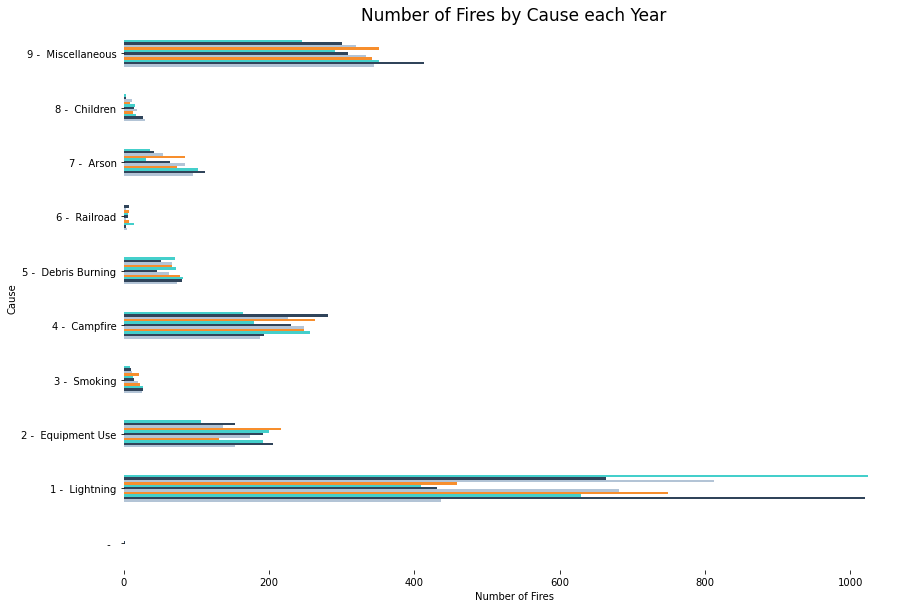

In [3]:
plot_df = pd.crosstab(fire_df['STATISTICAL_CAUSE'], fire_df['DISCOVER_YEAR'])#.apply(lambda r: r/r.sum()*100, axis=0)
plot_df.sort_values('STATISTICAL_CAUSE', ascending = True, inplace = True)

ax = plot_df.plot.barh(figsize=(14,10))
plt.box(on=None)
plt.title('Number of Fires each Year by Cause ', fontsize=17)
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, title = "Risky")
ax.get_legend().remove()
plt.xlabel('Number of Fires each Year')
plt.ylabel('Cause, Year')
plt.show()

## Question 1: Do weather distributions vary by fire cause?  
Percipitation has a larger range for fires caused by nature (lightening), which makes sense because storms also come with rain. Human caused fires seem to be on days with less rain--perhaps because we avoid going out in the rain.     

The temperature on the day of fire ignition has a much larger range for human caused fires than those caused by lightening. Interestlying, the distribution for lightening is centered around a higher temperature.        

Windspeed also has a larger range for humans, but for both lightening and humans, the distribution is centered around the same values. 

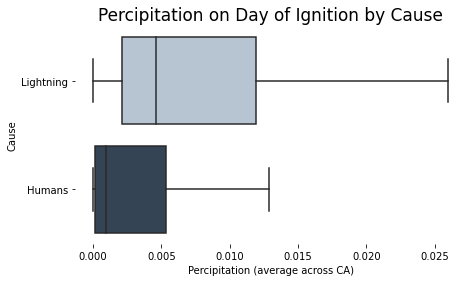

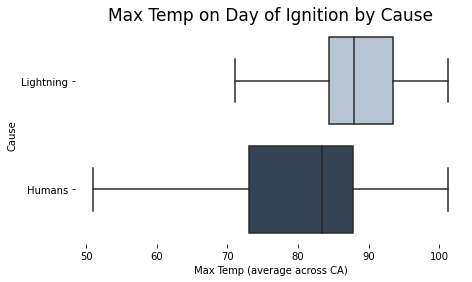

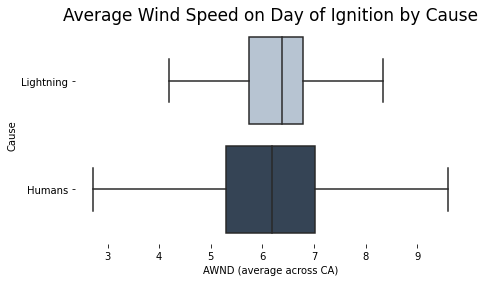

In [4]:
plt.figure(figsize=(7,4))
sns.boxplot(data = df, x = 'PRCP', y='NATURAL_CAUSE', showfliers=False)
plt.box(on=None)
plt.title('Percipitation on Day of Ignition by Cause', fontsize=17)
plt.xlabel('Percipitation (average across CA)')
plt.ylabel('Cause')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data = df, x = 'TMAX', y='NATURAL_CAUSE', showfliers=False)
plt.box(on=None)
plt.title('Max Temp on Day of Ignition by Cause', fontsize=17)
plt.xlabel('Max Temp (average across CA)')
plt.ylabel('Cause')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data = df, x = 'AWND', y='NATURAL_CAUSE', showfliers=False)
plt.box(on=None)
plt.title('Average Wind Speed on Day of Ignition by Cause', fontsize=17)
plt.xlabel('AWND (average across CA)')
plt.ylabel('Cause')
plt.show()

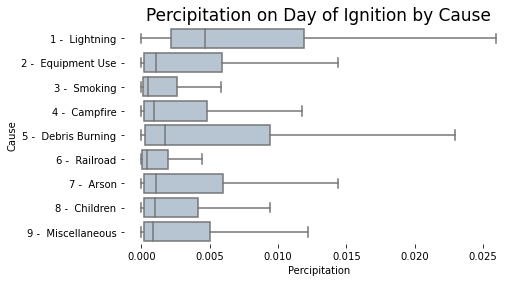

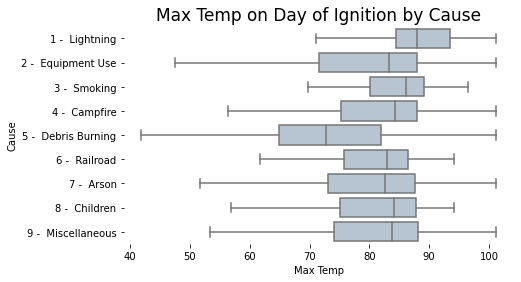

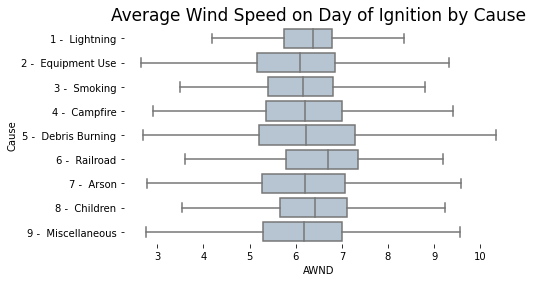

In [5]:
plt.figure(figsize=(7,4))
sns.boxplot(data = df, x = 'PRCP', y='STATISTICAL_CAUSE', showfliers=False, color = '#B3C4D6')
plt.box(on=None)
plt.title('Percipitation on Day of Ignition by Cause', fontsize=17)
plt.xlabel('Percipitation')
plt.ylabel('Cause')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data = df, x = 'TMAX', y='STATISTICAL_CAUSE', showfliers=False, color = '#B3C4D6')
plt.box(on=None)
plt.title('Max Temp on Day of Ignition by Cause', fontsize=17)
plt.xlabel('Max Temp')
plt.ylabel('Cause')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data = df, x = 'AWND', y='STATISTICAL_CAUSE', showfliers=False, color = '#B3C4D6')
plt.box(on=None)
plt.title('Average Wind Speed on Day of Ignition by Cause', fontsize=17)
plt.xlabel('AWND')
plt.ylabel('Cause')
plt.show()

## Question 2: Does the relationship of weather variables and number of fires change by fire cause?
Notes: 
* maybe precipitation should be a 7 day rolling average
* perhaps should do a count by week or month

<ipython-input-6-726cf213f96d>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby(['IGNITION', 'NATURAL_CAUSE'])[cols].agg(np.mean).reset_index()


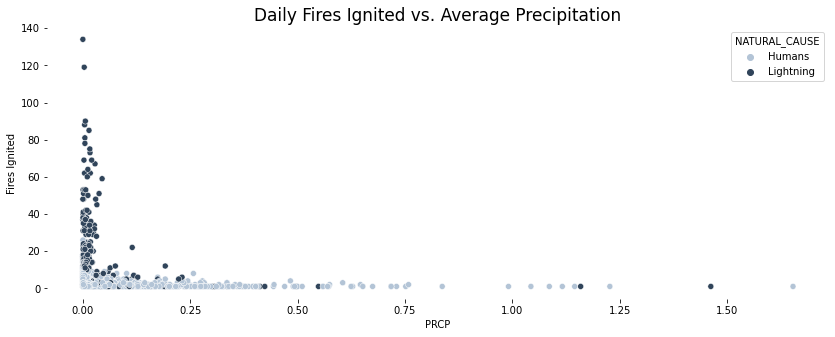

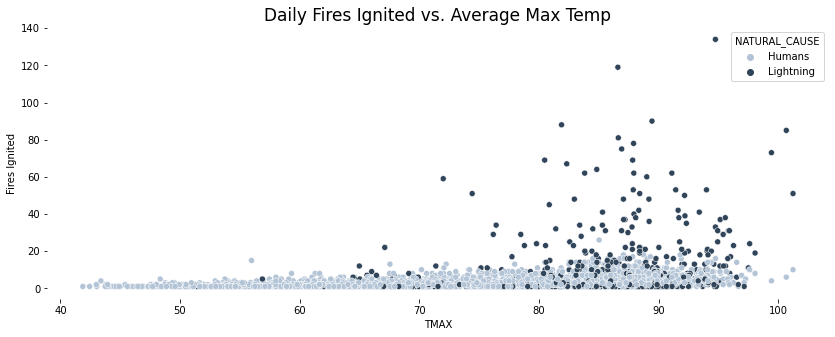

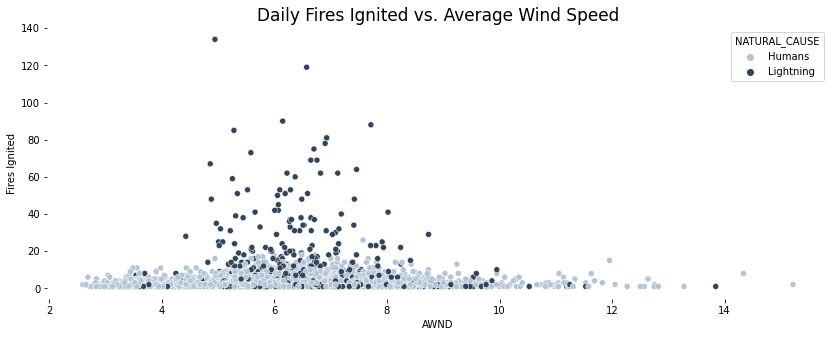

In [6]:
cols = 'AWND', 'PRCP', 'TMAX'
df1 = df.groupby(['IGNITION', 'NATURAL_CAUSE']).size().reset_index()
df1.columns = ['IGNITION', 'NATURAL_CAUSE', 'COUNT']
df2 = df.groupby(['IGNITION', 'NATURAL_CAUSE'])[cols].agg(np.mean).reset_index()

counts_cause_df = pd.merge(df1, df2, on = ['IGNITION', 'NATURAL_CAUSE'])

# Drop that one weird day
counts_cause_df = counts_cause_df[counts_cause_df.COUNT != counts_cause_df.COUNT.max()]

plt.figure(figsize=(14,5))
sns.scatterplot(data=counts_cause_df, x="PRCP", y="COUNT", hue='NATURAL_CAUSE')
plt.box(on=None)
plt.title('Daily Fires Ignited vs. Average Precipitation', fontsize=17)
plt.ylabel('Fires Ignited')
plt.show()

plt.figure(figsize=(14,5))
sns.scatterplot(data=counts_cause_df, x="TMAX", y="COUNT", hue='NATURAL_CAUSE')
plt.box(on=None)
plt.title('Daily Fires Ignited vs. Average Max Temp', fontsize=17)
plt.ylabel('Fires Ignited')
plt.show()

plt.figure(figsize=(14,5))
sns.scatterplot(data=counts_cause_df, x="AWND", y="COUNT", hue='NATURAL_CAUSE')
plt.box(on=None)
plt.title('Daily Fires Ignited vs. Average Wind Speed', fontsize=17)
plt.ylabel('Fires Ignited')
plt.show()

In [7]:
df.NATURAL_CAUSE.value_counts()

Humans       9759
Lightning    6983
Name: NATURAL_CAUSE, dtype: int64

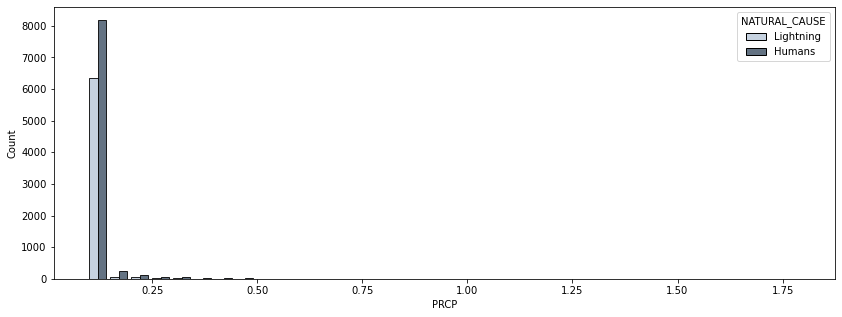

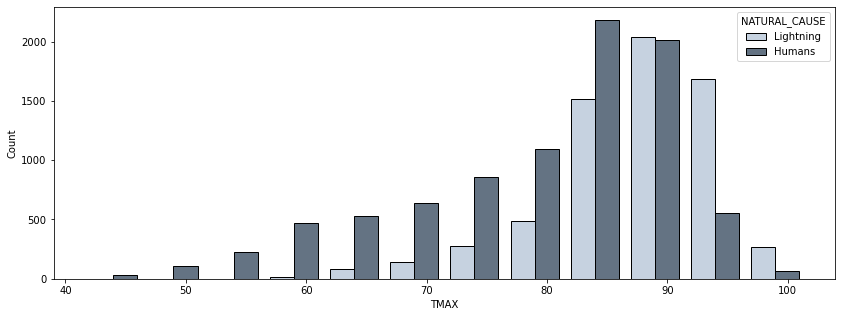

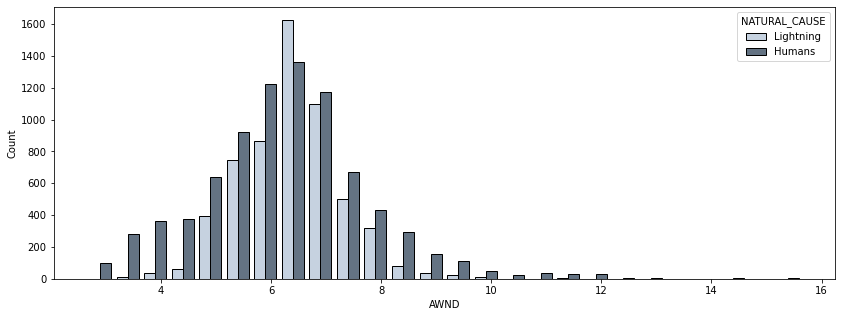

In [8]:
plt.figure(figsize=(14,5))
sns.histplot(data=df, x="PRCP", hue='NATURAL_CAUSE', binwidth = .05, multiple="dodge", palette = color_palette[:2], shrink=.8)
plt.show()

plt.figure(figsize=(14,5))
sns.histplot(data=df, x="TMAX", hue='NATURAL_CAUSE', binwidth=5, multiple="dodge", palette = color_palette[:2], shrink=.8)
plt.show()

plt.figure(figsize=(14,5))
sns.histplot(data=df, x="AWND", hue='NATURAL_CAUSE', binwidth = .5, multiple="dodge", palette = color_palette[:2], shrink=.8)
plt.show()

## Does it matter? Can we stop human fires quicker because someone is around them?

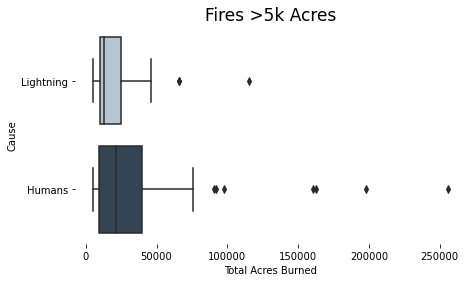

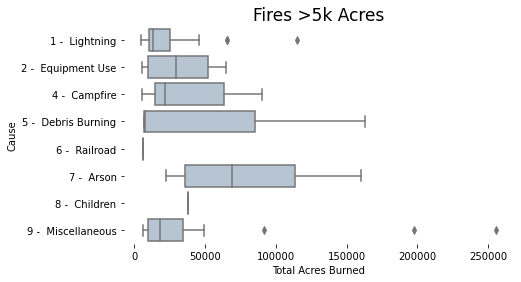

In [9]:
plot_df = df[df.TOTAL_ACRES_BURNED > 5000]

plt.figure(figsize=(7,4))
sns.boxplot(data = plot_df, x = 'TOTAL_ACRES_BURNED', y='NATURAL_CAUSE')
plt.box(on=None)
plt.title('Fires >5k Acres', fontsize=17)
plt.xlabel('Total Acres Burned')
plt.ylabel('Cause')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data = plot_df, x = 'TOTAL_ACRES_BURNED', y='STATISTICAL_CAUSE', color = '#B3C4D6')
plt.box(on=None)
plt.title('Fires >5k Acres', fontsize=17)
plt.xlabel('Total Acres Burned')
plt.ylabel('Cause')
plt.show()

In [10]:
df.groupby('NATURAL_CAUSE')['TOTAL_ACRES_BURNED'].sum().reset_index()

,NATURAL_CAUSE,TOTAL_ACRES_BURNED
0,Humans,2316239.03
1,Lightning,2162341.54


### Zooming in on Debris Burning

<ipython-input-11-91c6443b4d2a>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = plotdf.groupby(['IGNITION', 'STATISTICAL_CAUSE'])[cols].agg(np.mean).reset_index()


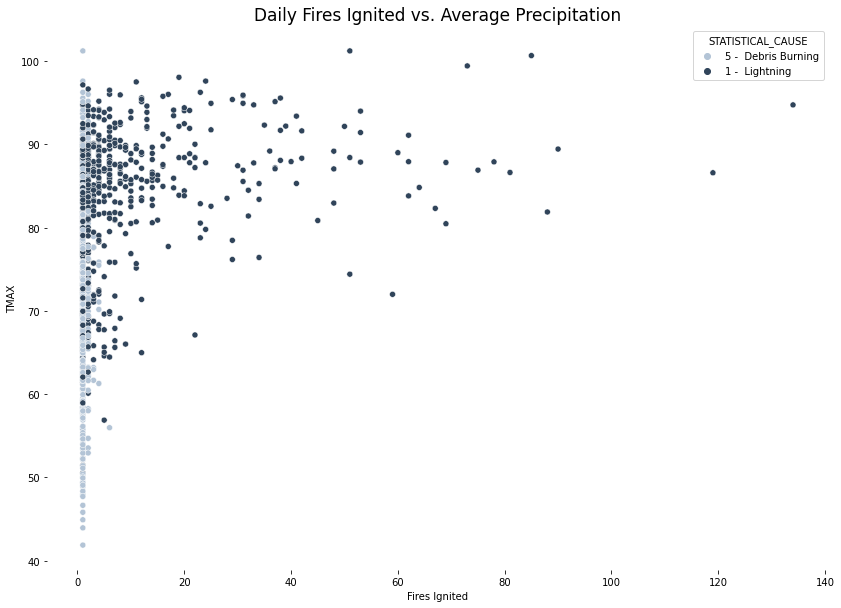

In [11]:
plotdf = df[df.STATISTICAL_CAUSE.isin(['1 -  Lightning', '5 -  Debris Burning'])]

cols = 'AWND', 'PRCP', 'TMAX'
df1 = plotdf.groupby(['IGNITION', 'STATISTICAL_CAUSE']).size().reset_index()
df1.columns = ['IGNITION', 'STATISTICAL_CAUSE', 'COUNT']
df2 = plotdf.groupby(['IGNITION', 'STATISTICAL_CAUSE'])[cols].agg(np.mean).reset_index()

counts_cause_df = pd.merge(df1, df2, on = ['IGNITION', 'STATISTICAL_CAUSE'])

# Drop that one weird day
counts_cause_df = counts_cause_df[counts_cause_df.COUNT != counts_cause_df.COUNT.max()]

plt.figure(figsize=(14,10))
sns.scatterplot(data=counts_cause_df, x="COUNT", y="TMAX", hue='STATISTICAL_CAUSE')
plt.box(on=None)
plt.title('Daily Fires Ignited vs. Average Precipitation', fontsize=17)
plt.xlabel('Fires Ignited')
plt.show()